In [2]:
import sys
sys.path.append('..')
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import networks
import torch
import mmcv
from mmcv.runner import load_checkpoint
from PIL import Image
from transforms import eval_transform
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import glob


root = '/home/jie.wang/data/CUB_200_2011/images/'
imagelist = sorted(glob.glob(root+'*/*.jpg'))

In [17]:
def read_image(path):
    img = Image.open(path).convert('RGB')
    img = img.resize((448,448))
    print(path)
    plt.figure()
    plt.axis('off')
    plt.imshow(np.array(img))
    input = eval_transform(img)
    return input[None], img

In [6]:
net = networks.resnet50_stn(num_classes=200, size=14).cuda()
checkpoint = load_checkpoint(net, '../out/resnet50_stn/latest.pth')
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

/home/jie.wang/data/CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0047_12966.jpg
tensor(13, device='cuda:0')


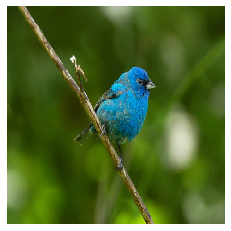

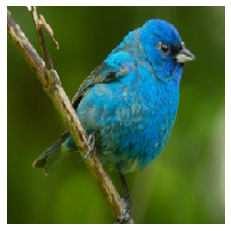

In [55]:
input, img = read_image(imagelist[750])
input = input.cuda()
output, theta = net(input)
print(torch.argmax(output))
img = np.array(img).transpose((2,0,1))[None]
img_tensor = torch.from_numpy(img).float().cuda()
img_crop = crop_img(img_tensor, theta)
img_crop = img_crop.squeeze().detach().cpu().numpy().transpose((1,2,0)).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.imshow(img_crop)

In [25]:
def crop_img(feature, theta):
    matrix = torch.zeros(feature.size(0), 2, 2).to(feature.device)
    matrix[:, 0, 0] = 0.5
    matrix[:, 1, 1] = 0.5
    matrix = torch.cat([matrix, theta], dim=2)

    grid = F.affine_grid(matrix, feature.size())
    feature = F.grid_sample(feature, grid)
    return feature

In [32]:
img_tensor.size()

torch.Size([1, 3, 448, 448])

In [38]:
img_crop

array([[[136.6875, 132.1875, 120.9375],
        [138.5   , 134.5   , 124.    ],
        [141.5   , 137.5   , 128.    ],
        ...,
        [145.75  , 152.4375, 137.8125],
        [144.75  , 152.8125, 136.9375],
        [143.75  , 153.0625, 136.5   ]],

       [[137.0625, 132.5625, 121.3125],
        [139.625 , 135.625 , 125.    ],
        [141.875 , 137.875 , 128.    ],
        ...,
        [145.25  , 152.    , 137.25  ],
        [144.25  , 152.5   , 136.25  ],
        [143.25  , 152.75  , 135.75  ]],

       [[139.1875, 134.6875, 123.4375],
        [141.375 , 137.375 , 126.5   ],
        [141.125 , 137.125 , 126.5   ],
        ...,
        [144.75  , 151.5   , 136.75  ],
        [143.75  , 152.    , 135.75  ],
        [142.75  , 152.25  , 135.25  ]],

       ...,

       [[125.9375, 118.0625, 104.25  ],
        [131.5   , 124.375 , 111.8125],
        [136.5   , 131.125 , 119.4375],
        ...,
        [ 91.9375, 109.1875,  67.1875],
        [ 92.8125, 110.0625,  68.0625],
        [